# Credit Eligibility Assessment
The credit eligibility assessment is a critical step in the lending process. It involves evaluating the borrower's credit along with several other details such as their income, credit score, etc. to decide whether a bank should loan the credit amount.




In [34]:
# For data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

#For ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [35]:
# Load the dataset into a DataFrame and save it in a variable 
df0 = pd.read_csv(r"C:\Users\hp\OneDrive\Documents\GitHub\credit_line_eligibility\data\credit_eligibility.csv")

# Display  the top 5 rows and all the columns of df0
df0.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [37]:
# Display the size of df0
print(f'Shape of the dataset: {df0.shape}')

Shape of the dataset: (396030, 27)


In [38]:
# Display a list of all the columns of df0
print(f'List of all the columns in the dataset: {df0.columns}')

List of all the columns in the dataset: Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')


### Column Details
**loan_amnt** : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

**term** : The number of payments on the loan. Values are in months and can be either 36 or 60.

**int_rate** : Interest Rate on the loan

**installment** : The monthly payment owed by the borrower if the loan originates.

**grade** : Bank assigned loan grade

**sub_grade** : Bank assigned loan subgrade

**emp_title** :The employment/job title supplied by the Borrower when applying for the loan.*

**emp_length** : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

**home_ownership** : The home ownership status provided by the borrower during registration or obtained from the credit report.

**annual_inc** : The self-reported annual income provided by the borrower during registration.

**verification_status** : Indicates if income was verified by Bank, not verified, or if the income source was verified

**issue_d** : The month which the loan was funded

**loan_status** : Current status of the loan - Target Variable

**purpose** : A category provided by the borrower for the loan request.

**title** : The loan title provided by the borrower

**dti** : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the 
requested Bank loan, divided by the borrower’s self-reported monthly income.

**earliest_cr_line** :The month the borrower's earliest reported credit line was opened

**open_acc** : The number of open credit lines in the borrower's credit file.

**pub_rec** : Number of derogatory public records

**revol_bal** : Total credit revolving balance

**revol_util** : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

**total_acc** : The total number of credit lines currently in the borrower's credit file

**initial_list_status** : The initial listing status of the loan. Possible values are – W, F

**application_type** : Indicates whether the loan is an individual application or a joint application with two co-borrowers

**mort_acc** : Number of mortgage accounts.

**pub_rec_bankruptcies** : Number of public record bankruptcies

**Address**: Address of the individual

In [39]:
# Display basic information about the dataset 
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [40]:
# Display number of unique values of all the columns
for col in df0.columns:
    print(f'Number of unique values in {col}: {df0[col].nunique()}')

Number of unique values in loan_amnt: 1397
Number of unique values in term: 2
Number of unique values in int_rate: 566
Number of unique values in installment: 55706
Number of unique values in grade: 7
Number of unique values in sub_grade: 35
Number of unique values in emp_title: 173105
Number of unique values in emp_length: 11
Number of unique values in home_ownership: 6
Number of unique values in annual_inc: 27197
Number of unique values in verification_status: 3
Number of unique values in issue_d: 115
Number of unique values in loan_status: 2
Number of unique values in purpose: 14
Number of unique values in title: 48816
Number of unique values in dti: 4262
Number of unique values in earliest_cr_line: 684
Number of unique values in open_acc: 61
Number of unique values in pub_rec: 20
Number of unique values in revol_bal: 55622
Number of unique values in revol_util: 1226
Number of unique values in total_acc: 118
Number of unique values in initial_list_status: 2
Number of unique values i

In [41]:
# Gather descriptive statistics about the data
df0.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [42]:
df0.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [44]:
# Typecasting columns of the dataset for memory optimization and correct data representation

# for columns with <=35 unique values, converting them to category dtype 
cat_cols = {'term','grade','sub_grade','emp_length','home_ownership','verification_status','loan_status','purpose','initial_list_status',
            'application_type', 'pub_rec'}
for col in cat_cols:
    df0[col] = df0[col].astype('category')
    
# converting 'emp_length to numeric
d = {'10+ years':10, '9 years':9, '8 years':8, '7 years':7, '6 years':6,
     '5 years':5, '4 years':4, '3 years':3, '2 years':2,  '1 year':1,
     '< 1 year':0 }
df0['emp_length']=df0['emp_length'].replace(d)

# converting 'term' to numeric
d = {' 36 months':36, ' 60 months':60}
df0['term']=df0['term'].replace(d)

# converting issue date and earliest credit line columns into datetime
df0['issue_d'] = pd.to_datetime(df0['issue_d'])
df0['earliest_cr_line'] = pd.to_datetime(df0['earliest_cr_line'])

In [45]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             396030 non-null  float64       
 1   term                  396030 non-null  category      
 2   int_rate              396030 non-null  float64       
 3   installment           396030 non-null  float64       
 4   grade                 396030 non-null  category      
 5   sub_grade             396030 non-null  category      
 6   emp_title             373103 non-null  object        
 7   emp_length            377729 non-null  category      
 8   home_ownership        396030 non-null  category      
 9   annual_inc            396030 non-null  float64       
 10  verification_status   396030 non-null  category      
 11  issue_d               396030 non-null  datetime64[ns]
 12  loan_status           396030 non-null  category      
 13 

#### Cleaning the data

1. Checking for null/missing values
2. Handling missing values
3. Checking for duplicated values
4. Checking for outliers


In [46]:
# Checking the data for any null values

df0.isna().sum()*100/df0.shape[0]

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [47]:
# Handling missing values

#Filling missing values with 'Unknown' for title and emp_title columns

fill_values = {'title': 'Unknown', 'emp_title': 'Unknown'}
df0.fillna(value=fill_values, inplace=True)

# Taking mean of mort_acc by total_acc to fill missing values in mort_acc

mort_avg = df0.groupby('total_acc')['mort_acc'].mean()

def mort(total_acc, mort_acc):
  if np.isnan(mort_acc):
    return mort_avg[total_acc].round()
  else:
    return mort_acc

df0['mort_acc'] = df0.apply(lambda x: mort(x['total_acc'],x['mort_acc']), axis=1)


In [48]:
df0.dropna(inplace=True)

In [49]:
if np.any(df0.isna())==True:
    print("There are still null values in the data")
else:
    print("There are no null values in the data")
    

There are no null values in the data


In [50]:
# Checking the data for duplicated rows

if np.any(df0.duplicated())==True:
    print("There are duplicated rows in the dataset")
else:
    print("There are no duplicated rows in the dataset")

There are no duplicated rows in the dataset


In [51]:
print(f'Shape of the data after cleaning: {df0.shape}')

Shape of the data after cleaning: (376929, 27)


In [52]:
# converting some columns category data type

df0[['pub_rec_bankruptcies','mort_acc']] = df0[['pub_rec_bankruptcies','mort_acc']].astype('category')

In [53]:
# Outlier Detection

num_cols = df0.select_dtypes(include='number').columns
num_cols

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc'],
      dtype='object')

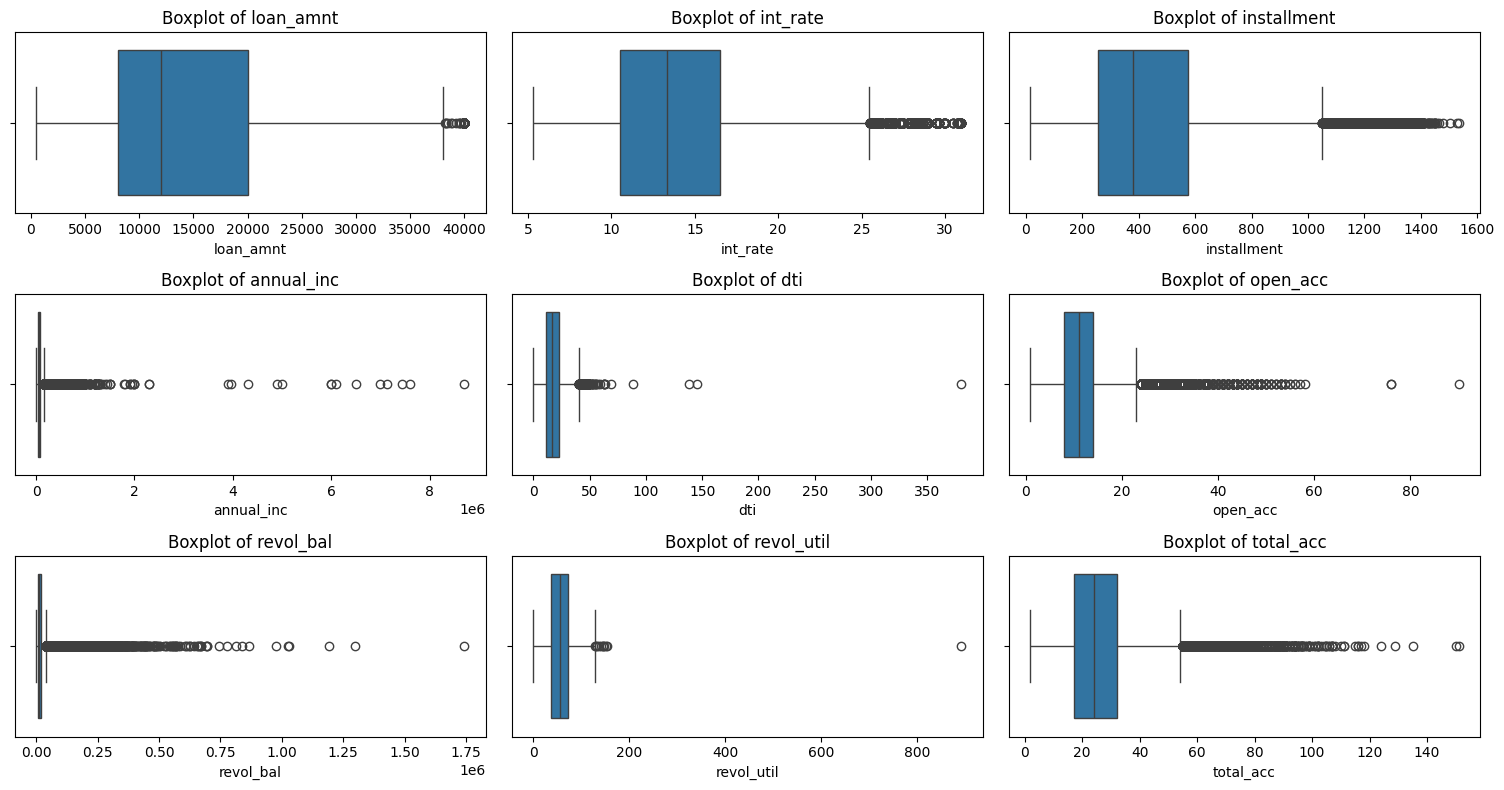

In [54]:
fig = plt.figure(figsize=(15,8))
i=1
for col in num_cols:
  ax = plt.subplot(3,3,i)
  sns.boxplot(x=df0[col])
  plt.title(f'Boxplot of {col}')
  i += 1

plt.tight_layout()
plt.show()

In [ ]:
def iqr_limits(series, multiplier=1.5):
    """
    Calculate upper and lower bounds using the IQR method.
    
    Parameters:
    - series: Pandas Series (column) for which to compute IQR limits.
    - multiplier: Controls the strictness of outlier detection (default: 1.5).
    
    Returns:
    - (lower_limit, upper_limit): Tuple containing lower and upper bounds.
    """
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - multiplier * IQR
    upper_limit = Q3 + multiplier * IQR
    return lower_limit, upper_limit



In [56]:
# Handling Outliers
df1 = df0.copy()

# ----------------------------------------------------------------------------------------------------------------------------------------

# Using IQR method for outlier removal of 'loan_amnt', 'int_rate' and 'installment'

cols = ['loan_amnt', 'int_rate', 'installment']
mask = pd.Series(True, index=df1.index)

# Calculate the upper and lower limits
for col in cols:
    ll, ul = iqr_limits(df0[col], multiplier=1.5)
    
    # Update mask: Mark False where outliers exist in any column
    mask &= (df1[col] >= ll) & (df1[col] <= ul)
    outliers = df1[(df1[col] < ll) | (df1[col] > ul)]
    print(f"Outliers in {col}: {len(outliers)} ({(len(outliers)/len(df1))*100:.2f}%)")

# Apply the mask to filter out rows with outliers
df1 = df1[mask]

# ----------------------------------------------------------------------------------------------------------------------------------------

# Using Quantile based outlier removal method for handling upper bound columns like 'open_acc', 'revol_util', 'total_acc'

cols = ['open_acc', 'revol_util', 'total_acc']

for col in cols:
    lower = df0[col].quantile(0.01)  # 1st percentile
    upper = df0[col].quantile(0.99)  # 99th percentile
    
    df1 = df1[(df1[col] >= lower) & (df1[col] <= upper)]
    outliers = df1[(df1[col] < ll) | (df1[col] > ul)]
    print(f"Outliers in {col}: {len(outliers)} ({(len(outliers)/len(df1))*100:.2f}%)")
    
# ----------------------------------------------------------------------------------------------------------------------------------------

# Using Yeo-Johnson and capping for handling heavily skewed 'annual_inc', 'revol_bal', 'dti'

from sklearn.preprocessing import PowerTransformer

cols = ['annual_inc', 'revol_bal', 'dti']
pt = PowerTransformer(method='yeo-johnson')

for col in cols:
    df1[col] = pt.fit_transform(df1[[col]])
    
    # Checking the outlier percentage for transformed columns
    ll, ul = iqr_limits(df1[col], multiplier=1.5) 
    outliers = df1[(df1[col] < ll) | (df1[col] > ul)]
    print(f"Outliers in {col}: {len(outliers)} ({(len(outliers)/len(df1))*100:.2f}%)")


Outliers in loan_amnt: 187 (0.05%)
Outliers in int_rate: 3597 (0.95%)
Outliers in installment: 10444 (2.77%)
Outliers in open_acc: 0 (0.00%)
Outliers in revol_util: 0 (0.00%)
Outliers in total_acc: 0 (0.00%)
Outliers in annual_inc: 3849 (1.11%)
Outliers in revol_bal: 7727 (2.23%)
Outliers in dti: 111 (0.03%)


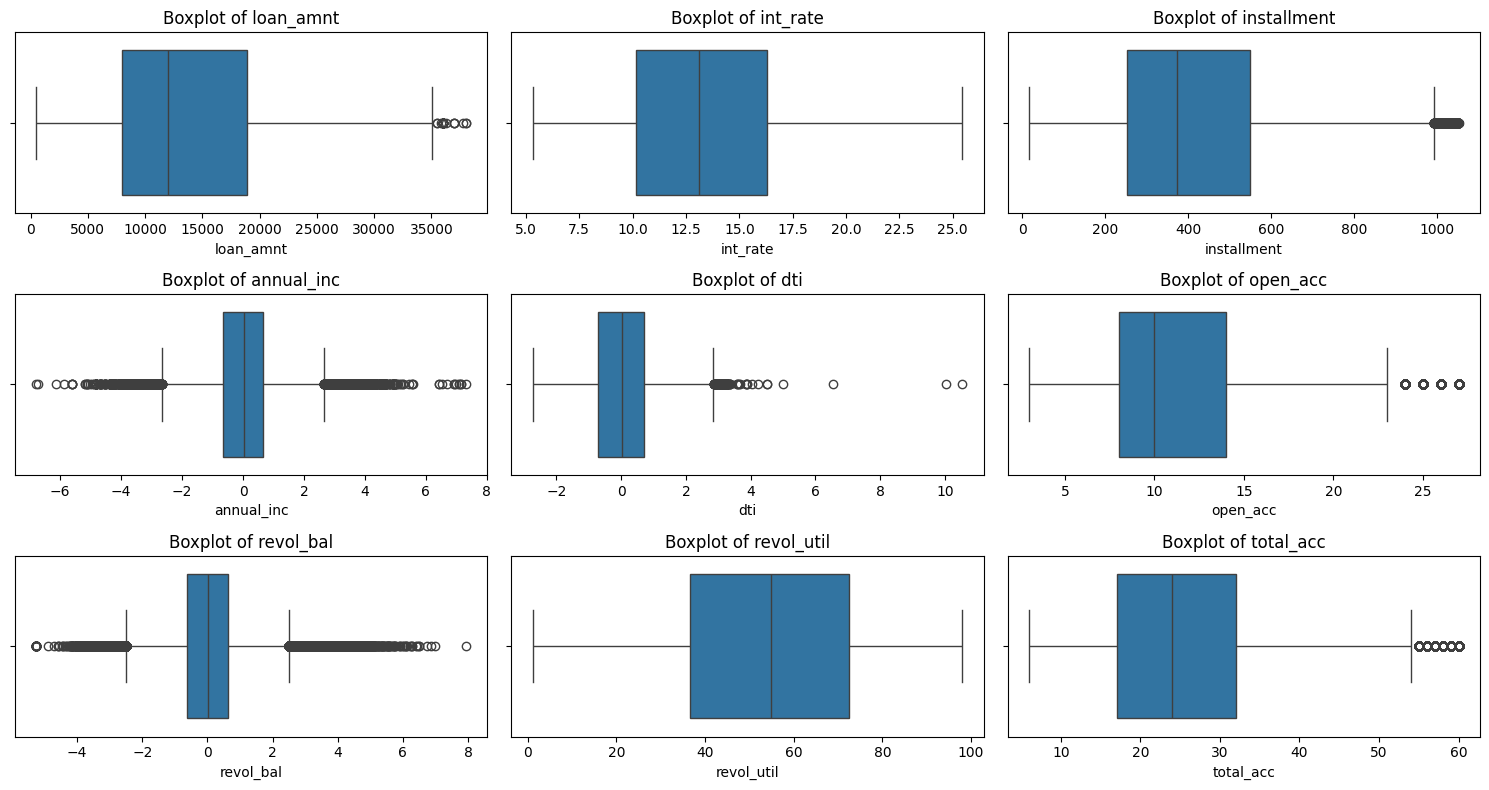

In [57]:
fig = plt.figure(figsize=(15,8))
i=1
for col in num_cols:
  ax = plt.subplot(3,3,i)
  sns.boxplot(x=df1[col])
  plt.title(f'Boxplot of {col}')
  i+= 1

plt.tight_layout()
plt.show()

In [58]:
df1.describe(include='number')

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc
count,346339.000000,346339.000000,346339.000000,3.463390e+05,3.463390e+05,346339.000000,3.463390e+05,346339.000000,346339.000000
mean,13676.581615,13.449211,414.010307,-1.669454e-15,-4.202460e-16,11.215018,2.520573e-16,53.984034,25.060556
std,7708.136624,4.308902,218.207342,1.000001e+00,1.000001e+00,4.589840,1.000001e+00,23.477530,10.836766
min,500.000000,5.320000,16.080000,-6.782545e+00,-2.734001e+00,3.000000,-5.251437e+00,1.100000,6.000000
25%,8000.000000,10.160000,251.590000,-6.669886e-01,-7.031103e-01,8.000000,-6.173423e-01,36.500000,17.000000
50%,12000.000000,13.110000,372.120000,2.672200e-02,1.323893e-02,10.000000,3.761883e-03,54.900000,24.000000
75%,18900.000000,16.290000,547.950000,6.603391e-01,7.185987e-01,14.000000,6.269750e-01,72.500000,32.000000
max,38000.000000,25.440000,1051.220000,7.307297e+00,1.053467e+01,27.000000,7.930934e+00,98.000000,60.000000


In [59]:
df1.shape

(346339, 27)

In [60]:
df0.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,329.48,B,B4,Marketing,10,RENT,117000.0,Not Verified,2015-01-01,Fully Paid,vacation,Vacation,26.24,1990-06-01,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4,MORTGAGE,65000.0,Not Verified,2015-01-01,Fully Paid,debt_consolidation,Debt consolidation,22.05,2004-07-01,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36,10.49,506.97,B,B3,Statistician,0,RENT,43057.0,Source Verified,2015-01-01,Fully Paid,credit_card,Credit card refinancing,12.79,2007-08-01,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6,RENT,54000.0,Not Verified,2014-11-01,Fully Paid,credit_card,Credit card refinancing,2.60,2006-09-01,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9,MORTGAGE,55000.0,Verified,2013-04-01,Charged Off,credit_card,Credit Card Refinance,33.95,1999-03-01,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [61]:
# Saving the cleaned data into a cleaned_data.csv and storing it under the data folder

df1.to_csv(r'C:\Users\hp\OneDrive\Documents\GitHub\credit_line_eligibility\data\cleaned_data.csv', index=False)